<a href="https://colab.research.google.com/github/mella30/Deep-Learning-with-Tensorflow-2/blob/main/Course1-Getting_started_with_TensorFlow_2/week2_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16, activation='relu'), 
                    Dense(16, activation='relu'), 
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
])

In [5]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model
model = Sequential([
                    Conv2D(16, 3, activation='relu', input_shape=(28,28, 1)),
                    MaxPooling2D(3),
                    Flatten(),
                    Dense(10, activation='softmax')
])


In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [23]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(
    optimizer=opt,
    loss=loss,
    metrics=[acc, mae]
    )


In [24]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
# empty metrics bug: https://github.com/tensorflow/tensorflow/issues/40030

[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [25]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [28]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [29]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [30]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [31]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

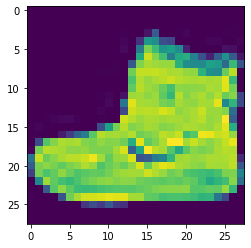

label: Ankle boot


In [32]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [42]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 13s 57ms/step - loss: 0.3160 - sparse_categorical_accuracy: 0.8879 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 13s 57ms/step - loss: 0.3059 - sparse_categorical_accuracy: 0.8903 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2959 - sparse_categorical_accuracy: 0.8942 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 13s 57ms/step - loss: 0.2921 - sparse_categorical_accuracy: 0.8955 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2866 - sparse_categorical_accuracy: 0.8953 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 13s 57ms/step - loss: 0.2780 - sparse_categorical_accuracy: 0.8999 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 13s 57ms/step - loss: 0.2741 - sparse_categoric

#### Plot training history

In [43]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.316019,0.887883,4.420001
1,0.305902,0.890350,4.420000
2,0.295916,0.894167,4.420000
3,0.292092,0.895517,4.420000
4,0.286584,0.895267,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs')]

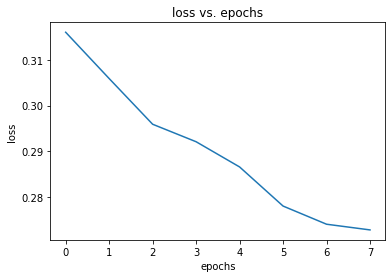

In [44]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='loss vs. epochs', legend=False)
loss_plot.set(xlabel='epochs', ylabel='loss')

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

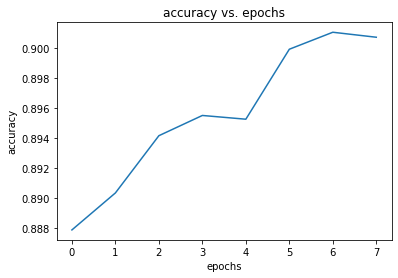

In [45]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy', title='accuracy vs. epochs', legend=False)
acc_plot.set(xlabel='epochs', ylabel='accuracy')

[Text(0, 0.5, 'mae'), Text(0.5, 0, 'epochs')]

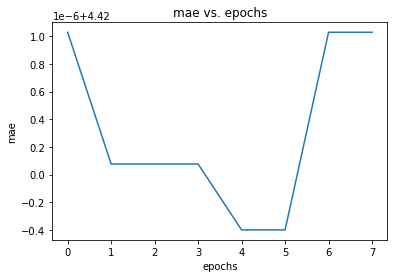

In [46]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error', title='mae vs. epochs', legend=False)
mae_plot.set(xlabel='epochs', ylabel='mae')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [47]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [50]:
# Evaluate the model

test_loss, test_acc, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3256 - sparse_categorical_accuracy: 0.8838 - mean_absolute_error: 4.4200


#### Make predictions from the model

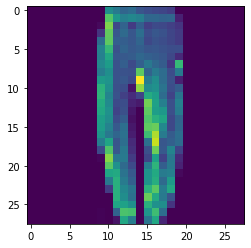

Label: Trouser


In [56]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [57]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Trouser
